In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [34]:
df = pd.read_csv("/kaggle/input/parkinsonsdataset/parkinsons.csv")
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


### EDA 

In [35]:
df.shape

(195, 24)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [37]:
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [38]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [39]:
#Checking how many people have Parkinsons with 1 representing Yes and 0 representing No
df['status'].value_counts()

status
1    147
0     48
Name: count, dtype: int64

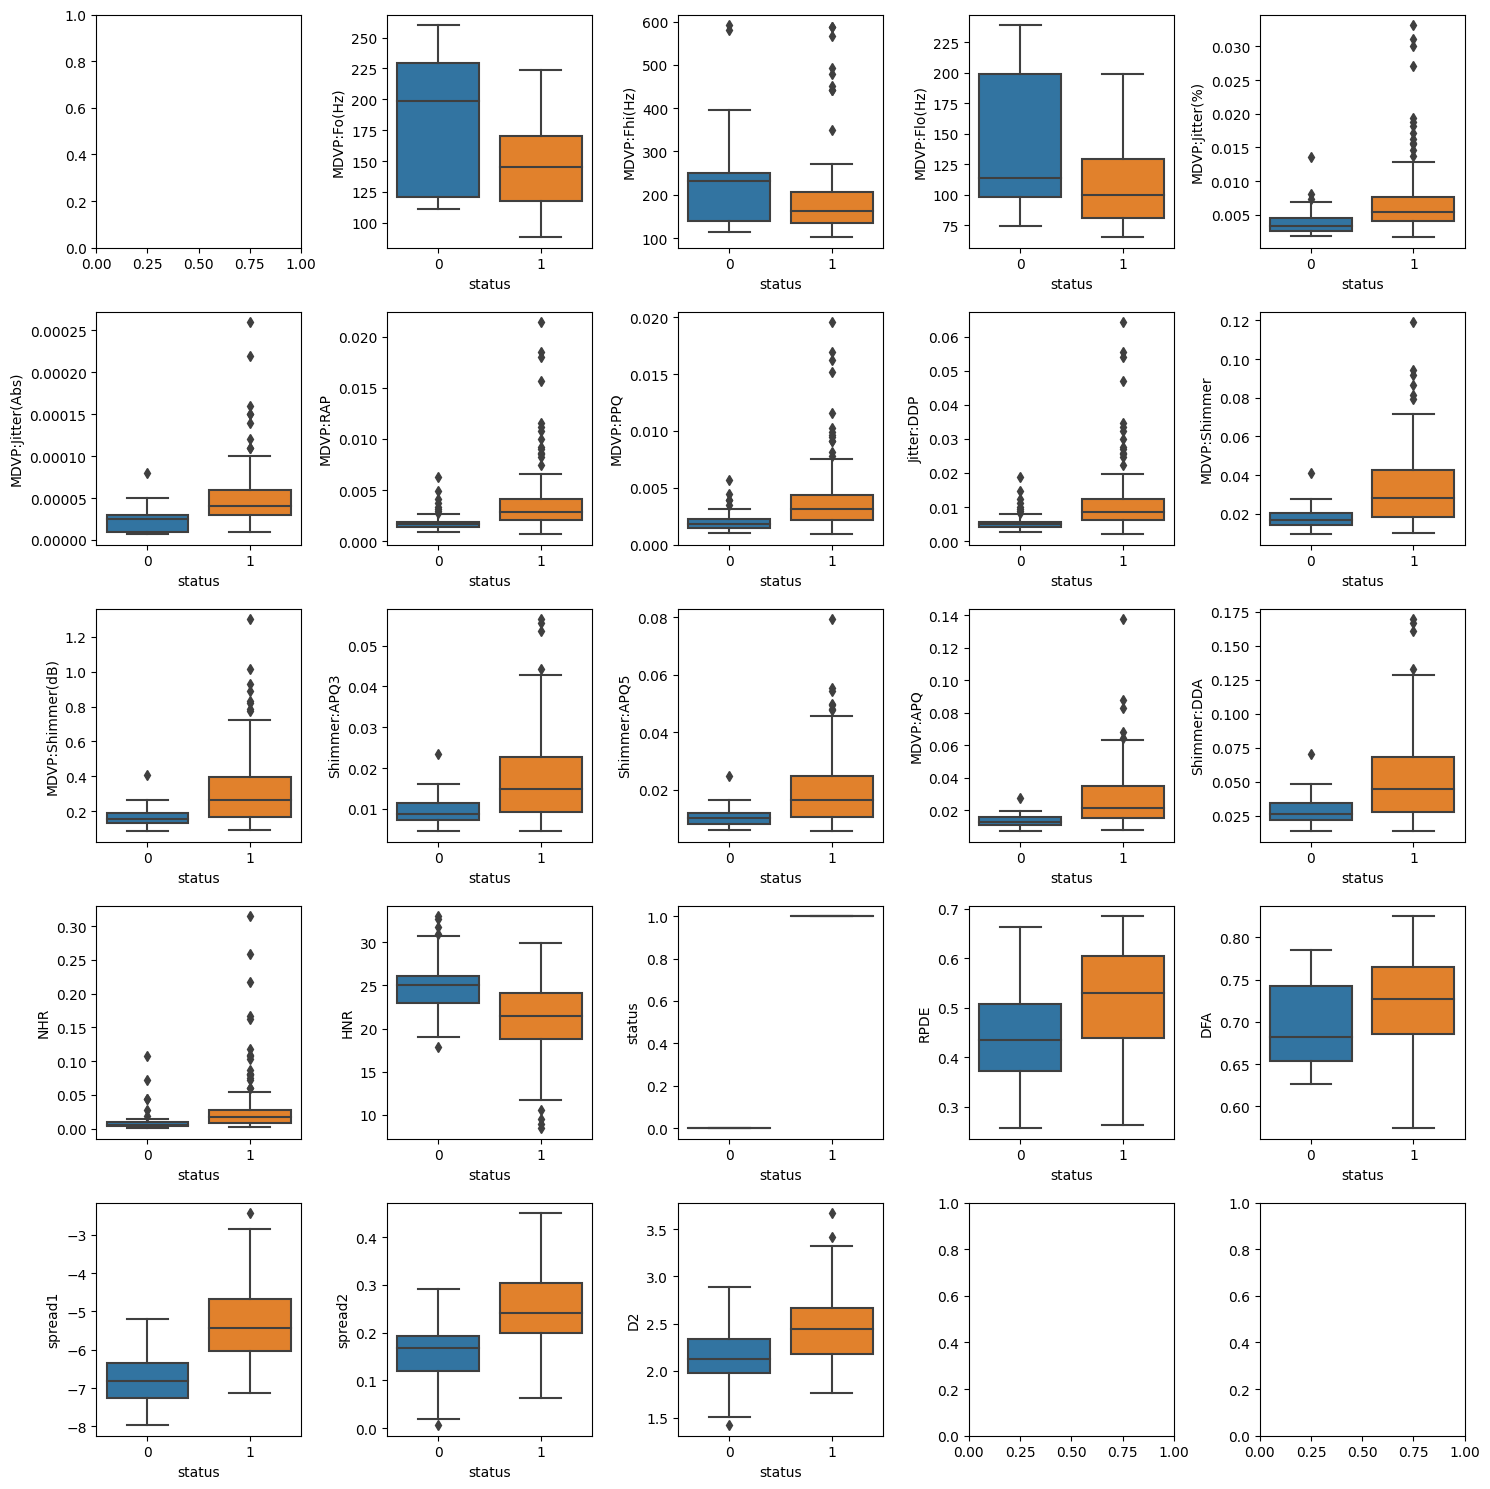

In [40]:
fig,axes=plt.subplots(5,5,figsize=(15,15))
axes=axes.flatten()

for i in range(1,len(df.columns)-1):
    sns.boxplot(x='status',y=df.iloc[:,i],data=df,orient='v',ax=axes[i])
plt.tight_layout()
plt.show()

<Axes: >

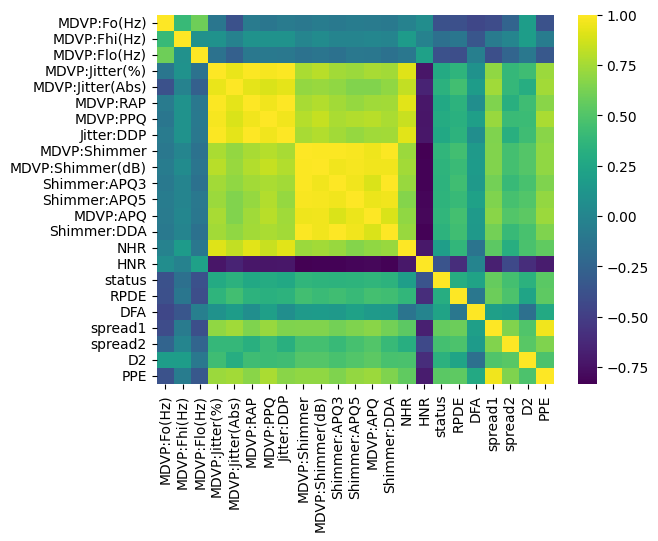

In [62]:
df1 = df.drop(['name'], axis =1)
correlation = df1.corr()
sns.heatmap(correlation, cmap = 'viridis')

### Preprocessing

In [41]:
X = df.drop(['name', 'status'], axis = 1)
y = df['status']

In [42]:
X.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [43]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: status, dtype: int64

#### Split

In [44]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2, random_state = 274)
print('X training shape ', Xtrain.shape)
print('X testing shape ', Xtest.shape)
print('y training shape ', ytrain.shape)
print('y testing shape ', ytest.shape)

X training shape  (156, 22)
X testing shape  (39, 22)
y training shape  (156,)
y testing shape  (39,)


#### Standardization 

In [45]:
ss = StandardScaler()

In [46]:
ss.fit(Xtrain)

StandardScaler()

In [47]:
cols = Xtrain.columns
cols

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1',
       'spread2', 'D2', 'PPE'],
      dtype='object')

In [48]:
Xtrain = ss.transform(Xtrain)
Xtest = ss.transform(Xtest)

In [49]:
Xtrain = pd.DataFrame(Xtrain, columns = cols)
Xtest = pd.DataFrame(Xtest, columns = cols)

In [50]:
Xtrain.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,-0.940913,-0.846620,-0.444548,-0.538404,-0.398332,-0.512484,-0.486217,-0.511541,-0.782461,-0.745947,...,-0.732069,-0.795423,-0.478228,1.059161,-1.157641,0.888892,-0.235076,-0.428014,-1.434399,-0.295610
1,0.093765,-0.017290,-0.860238,0.128100,-0.129794,0.215738,0.170729,0.215620,-0.322741,-0.284271,...,-0.389418,-0.271489,-0.124866,-0.623814,1.148279,0.213910,-0.235712,-1.026391,-1.220057,-0.269383
2,-0.012199,-0.410975,0.451325,-0.714207,-0.666870,-0.688261,-0.763366,-0.687315,-0.794072,-0.725654,...,-0.660783,-0.907510,-0.436750,1.124640,-1.028906,-0.282905,-0.840730,0.271309,0.361503,-1.139636
3,-0.248630,0.218318,-0.779036,-0.499766,-0.398332,-0.556428,-0.486217,-0.556531,-0.766099,-0.781461,...,-0.605672,-0.772489,-0.395502,0.745049,0.638183,-1.023518,0.321560,-0.206831,-0.453956,0.327579
4,0.072329,0.322986,-0.854523,-0.613748,-0.666870,-0.550150,-0.578600,-0.551300,-0.652620,-0.603893,...,-0.424762,-0.775396,-0.432625,0.927060,-0.284978,-0.705891,-1.321273,0.646799,-0.353424,-1.103229


#### Model Training

In [51]:
svm = SVC(C = 0.000001, kernel = 'linear', random_state = 42)

In [52]:
svm.fit(Xtrain,ytrain)

SVC(C=1e-06, kernel='linear', random_state=42)

#### Training Accuracy

In [53]:
y_pred = svm.predict(Xtrain)
accuracy = accuracy_score(ytrain, y_pred)

In [54]:
print('Training Data Accuracy ', accuracy)

Training Data Accuracy  0.7564102564102564


#### Testing Accuracy 

In [55]:
test_pred = svm.predict(Xtest)
accuracytest = accuracy_score(ytest, test_pred)

In [56]:
print('Testing Data Accuracy ', accuracytest)

Testing Data Accuracy  0.7435897435897436


#### Predictive System

In [57]:
newdata = (162.568,198.346,77.63,0.00502,0.00003,0.0028,0.00253,0.00841,0.01791,0.168,0.00793,0.01057,0.01799,0.0238,0.0117,25.678,0.427785,0.723797,-6.635729,0.209866,1.957961,0.135242)
inputnp = np.asarray(newdata)

input = inputnp.reshape(1,-1)

stdin = ss.transform(input)

prediction = svm.predict(stdin)
print(prediction)

if (prediction[0] == 0):
    print("Person does not have Parkinson's!")
else:
    print("Person has Parkinson's")

[1]
Person has Parkinson's


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
